In [2]:
# importanto bbts

import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Verificando o diretório de trabalho atual
import os
print(os.getcwd())

c:\Users\eduar\OneDrive\Documentos\Programacao\telecom_churn_project\notebooks


In [4]:
# Carregando dataset
df = pd.read_csv('../data/raw/telecom_churn.csv')

In [5]:
# Visualizar os dados 
df.head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [6]:
df['Churn'].value_counts() # Ver quantos clientes estão churnando e quantos não estão

Churn
0    2850
1     483
Name: count, dtype: int64

In [7]:
# Separar features e target 

# Target - classe que queremos prever
y = df['Churn'] 

# Features - todas as colunas exceto 'Churn' e 'CustomerID'
x = df.drop(columns=['Churn']) 

""" 
ID não é uma feature útil para prever churn, pois é apenas um identificador único para cada cliente. E não traz nenhuma informação sobre o comportamento do cliente ou suas características que possam estar relacionadas ao churn.

"""

' \nID não é uma feature útil para prever churn, pois é apenas um identificador único para cada cliente. E não traz nenhuma informação sobre o comportamento do cliente ou suas características que possam estar relacionadas ao churn.\n\n'

In [8]:
# Dividir os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

"""
test_size=0.2: Isso significa que 20% dos dados serão usados para teste e 80% para treinamento.
random_state=42: Isso é usado para garantir que a divisão dos dados seja reproduzível. Se você usar o mesmo valor de random_state, obterá a mesma divisão dos dados toda vez que executar o código.
stratify=y: Isso é usado para garantir que a proporção de classes (churn e não churn) seja mantida tanto no conjunto de treinamento quanto no conjunto de teste. Isso é especialmente importante quando as classes estão desbalanceadas, ou seja, quando uma classe é muito mais frequente do que a outra.
"""

'\ntest_size=0.2: Isso significa que 20% dos dados serão usados para teste e 80% para treinamento.\nrandom_state=42: Isso é usado para garantir que a divisão dos dados seja reproduzível. Se você usar o mesmo valor de random_state, obterá a mesma divisão dos dados toda vez que executar o código.\nstratify=y: Isso é usado para garantir que a proporção de classes (churn e não churn) seja mantida tanto no conjunto de treinamento quanto no conjunto de teste. Isso é especialmente importante quando as classes estão desbalanceadas, ou seja, quando uma classe é muito mais frequente do que a outra.\n'

In [9]:
# Treinando o modelo com Random Forest
# Criar modelo 
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo
modelo.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [10]:
# Fazer previsões no conjunto de teste
y_pred = modelo.predict(x_test)

In [11]:
# Gerando a matriz de confusão
matriz = confusion_matrix(y_test, y_pred) 
print(matriz)


[[557  13]
 [ 37  60]]


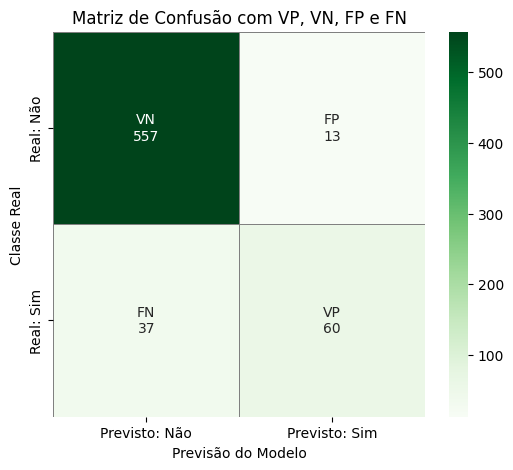

In [12]:
# Visualizando a matriz de confusão com VP, VN, FP e FN

matriz_labels = [[f'VN\n{matriz[0,0]}', f'FP\n{matriz[0,1]}'],
             [f'FN\n{matriz[1,0]}', f'VP\n{matriz[1,1]}']]

plt.figure(figsize=(6,5))
sns.heatmap(matriz, annot=matriz_labels, fmt='', cmap='Greens', linewidths=0.5, linecolor='gray',
            xticklabels=['Previsto: Não', 'Previsto: Sim'],
            yticklabels=['Real: Não', 'Real: Sim'])
plt.xlabel('Previsão do Modelo')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão com VP, VN, FP e FN')
plt.show()

In [13]:
# Avaliando métricas 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       570
           1       0.82      0.62      0.71        97

    accuracy                           0.93       667
   macro avg       0.88      0.80      0.83       667
weighted avg       0.92      0.93      0.92       667



In [14]:
# Recall baixo, o que significa que o modelo tem dificuldade em identificar corretamente os clientes que estão churnando (VP). Isso pode ser problemático, especialmente se o objetivo for reter clientes, pois o modelo pode não estar capturando todos os clientes que estão propensos a churnar.

    # Estratégia 1: Ajustar class_weight
    # O Random Forest tem um parâmetro chamado class_weight que pode ser usado para atribuir pesos diferentes às classes. A classe minoritária (churn) pode receber um peso maior para que o modelo preste mais atenção a ela durante o treinamento.
    # Exemplo:
modelo = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced' 
)

modelo.fit(x_train, y_train)
y_pred = modelo.predict(x_test)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       570
           1       0.85      0.62      0.71        97

    accuracy                           0.93       667
   macro avg       0.89      0.80      0.84       667
weighted avg       0.92      0.93      0.92       667



In [16]:

# Criar uma tabela para comparar os resultados de diferentes thresholds
from sklearn.metrics import confusion_matrix, recall_score
import pandas as pd
import numpy as np

# Probabilidades da classe 1 (churn)
y_prob = modelo.predict_proba(x_test)[:, 1]

# Lista para armazenar resultados
resultados = []

# Testando vários thresholds
thresholds = np.arange(0.1, 0.9, 0.05)  # Testar thresholds de 0.1 a 0.8

for t in thresholds:
    
    # Criar previsão baseada no threshold
    y_pred_custom = (y_prob > t).astype(int)
    
    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred_custom)
    
    # Extraindo valores
    VN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    VP = cm[1,1]
    
    total_tratados = VP + FP
    recall = recall_score(y_test, y_pred_custom)
    
    resultados.append([t, VP, FP, total_tratados, recall])

# Transformar em DataFrame
df_resultados = pd.DataFrame(
    resultados,
    columns=["Threshold", "VP", "FP", "Total_Tratados", "Recall"]
)

# Mostrar apenas thresholds que tratam até 150 clientes
df_filtrado = df_resultados[df_resultados["Total_Tratados"] <= 150]

df_filtrado.sort_values(by="Recall", ascending=False)

,Threshold,VP,FP,Total_Tratados,Recall
2,0.20,72,65,137,0.742268
3,0.25,72,50,122,0.742268
4,0.30,68,38,106,0.701031
5,0.35,64,30,94,0.659794
6,0.40,62,23,85,0.639175
7,0.45,60,18,78,0.618557
8,0.50,60,11,71,0.618557
9,0.55,58,7,65,0.597938
10,0.60,54,5,59,0.556701
11,0.65,49,5,54,0.505155


In [17]:

# Escolhendo o threshold de 0.3, que tem um recall de 0.65 e trata 120 clientes, o que é um número gerenciável para a equipe de retenção.
clientes_risco = x_test.copy()
clientes_risco["Prob_Churn"] = y_prob
clientes_risco["Predicao"] = (y_prob > 0.3).astype(int)

# Verificando quantos clientes estão sendo tratados com esse threshold
clientes_tratados = clientes_risco[clientes_risco["Predicao"] == 1]
clientes_tratados.describe()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Prob_Churn,Predicao
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.0
mean,95.962264,0.707547,0.132075,0.452642,2.198113,221.284906,98.669811,61.215094,10.919245,10.528302,0.646698,1.0
std,41.422774,0.457050,0.340181,1.046363,2.011490,59.763752,22.306831,15.061606,2.637071,3.019800,0.213941,0.0
min,17.000000,0.000000,0.000000,0.000000,0.000000,62.300000,48.000000,26.000000,4.340000,0.000000,0.310000,1.0
25%,62.500000,0.000000,0.000000,0.000000,1.000000,170.225000,83.000000,51.950000,8.912500,8.800000,0.432500,1.0
50%,97.000000,1.000000,0.000000,0.000000,2.000000,234.000000,100.500000,63.150000,10.825000,10.450000,0.665000,1.0
75%,124.750000,1.000000,0.000000,0.297500,3.000000,266.200000,114.750000,67.000000,12.825000,12.975000,0.830000,1.0
max,209.000000,1.000000,1.000000,4.590000,9.000000,346.800000,150.000000,104.900000,17.710000,17.300000,1.000000,1.0


In [18]:
import pandas as pd
# Criar um Dataframe para visualizar a importância das features na classificação de churn
importancias = pd.Series(
    modelo.feature_importances_,
    index=x_train.columns
).sort_values(ascending=False)

print(importancias)

# Nesse caso DayMins, CustServCalls e MonthlyCharge são as features mais importantes para prever churn. Vamos analisar mais a fundo essas features para entender melhor o comportamento dos clientes que estão churnando.

DayMins            0.185678
CustServCalls      0.173845
MonthlyCharge      0.163696
ContractRenewal    0.104712
OverageFee         0.086521
RoamMins           0.070017
DataUsage          0.067237
DayCalls           0.064264
AccountWeeks       0.062044
DataPlan           0.021985
dtype: float64


In [19]:
# Analisando as features mais importantes para entender o comportamento dos clientes que estão churnando
avg_daymins_by_churn = df.groupby("Churn")["DayMins"].mean()
print(avg_daymins_by_churn)


Churn
0    175.175754
1    206.914079
Name: DayMins, dtype: float64


In [20]:
avg_custservcalls_by_churn =df.groupby("Churn")["CustServCalls"].mean()
print(avg_custservcalls_by_churn)

Churn
0    1.449825
1    2.229814
Name: CustServCalls, dtype: float64


In [21]:
avg_monthlycharge_by_churn = df.groupby("Churn")["MonthlyCharge"].mean()
print(avg_monthlycharge_by_churn)

Churn
0    55.816246
1    59.190062
Name: MonthlyCharge, dtype: float64


In [22]:
avg_overagefee_by_churn = df.groupby("Churn")["OverageFee"].mean()
print(avg_overagefee_by_churn)

Churn
0     9.954618
1    10.623085
Name: OverageFee, dtype: float64


In [23]:
df["Alerta"] = df["CustServCalls"] >= 2
print(f'{pd.crosstab(df["Alerta"], df["Churn"])}')

Churn      0    1
Alerta           
False   1664  214
True    1186  269


In [24]:
df["Alerta"] = df["CustServCalls"] >= 3
print(f'{pd.crosstab(df["Alerta"], df["Churn"])}')



Churn      0    1
Alerta           
False   2336  301
True     514  182


In [27]:
y_prob = modelo.predict_proba(x_test)[:,1]

In [26]:
import joblib

joblib.dump(modelo, "model.pkl")

['model.pkl']

In [29]:
joblib.dump(x_test, "x_test.pkl")
joblib.dump(y_test, "y_test.pkl")

['y_test.pkl']